## Primary goal: centralized location for a few paper figures
* Changes in mean/max/min streamflow maps (Fig 3)

In [1]:
import scipy as scipy
import scipy.stats as stats
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import time 
import xarray as xr
import pickle 
import os

from netCDF4 import Dataset
from matplotlib import ticker

In [2]:
#Set filepaths 
# ctrlDir = '/scratch/mdfowler/CaMaOutput_Physiology/global_15min_physiologyControl/'
# fullDir = '/scratch/mdfowler/CaMaOutput_Physiology/global_15min_physiologyFull/'
# physDir = '/scratch/mdfowler/CaMaOutput_Physiology/global_15min_physiologyPhysiology/'
# radDir  = '/scratch/mdfowler/CaMaOutput_Physiology/global_15min_physiologyRadiation/'

#Get dimensions from a single file (same will be used for all files)
file1 = 'outflw1161.nc'
dat   = Dataset(file1)
lat   = dat.variables['lat'][:] 
lon   = dat.variables['lon'][:] 
days  = dat.variables['time'][:]

#Read in mask of which gridcells are land vs. ocean
matData   = sio.loadmat('validGridMask_CaMa.mat')
maskVal = matData['maskVal']
#Read in CaMa gridcell areas
matData = sio.loadmat('CaMa_gridAreas.mat')
area    = matData['area']

In [3]:
# Read in extreme flows 
[minCtrl_ann, minFull_ann, minPhys_ann, minRad_ann,maxCtrl_ann,maxFull_ann,
 maxPhys_ann,maxRad_ann,ctrl95_ann,full95_ann,phys95_ann,rad95_ann,ctrl5_ann,
 full5_ann,phys5_ann,rad5_ann] = pickle.load(open('StreamflowAnnualExtremes.pkl', 'rb' ))


## Using yearly 5th and 95th percentiles for low and high flow 

In [4]:
# -- Take average over 30 years -- #
ctrl95_annAvg = np.nanmean(ctrl95_ann,axis=0)   #High flows 
full95_annAvg = np.nanmean(full95_ann,axis=0)
phys95_annAvg = np.nanmean(phys95_ann,axis=0)
rad95_annAvg  = np.nanmean(rad95_ann,axis=0)

ctrl5_annAvg  = np.nanmean(ctrl5_ann,axis=0)    #Low flows 
full5_annAvg  = np.nanmean(full5_ann,axis=0)
phys5_annAvg  = np.nanmean(phys5_ann,axis=0)
rad5_annAvg   = np.nanmean(rad5_ann,axis=0)


/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__'

In [5]:
# -- Eliminate places without rivers -- # 
cutoffMax = 500
cutoffMin = 50

#CTRL
maxCtrlNew = ctrl95_annAvg
minCtrlNew = ctrl5_annAvg
maxCtrlNew[np.where(ctrl95_annAvg<=cutoffMax)] = np.nan
minCtrlNew[np.where(ctrl5_annAvg<=cutoffMin)] = np.nan

#FULL 
maxFullNew = full95_annAvg
minFullNew = full5_annAvg
maxFullNew[np.where(ctrl95_annAvg<=cutoffMax)] = np.nan
minFullNew[np.where(ctrl5_annAvg<=cutoffMin)] = np.nan

#PHYS 
maxPhysNew = phys95_annAvg
minPhysNew = phys5_annAvg
maxPhysNew[np.where(ctrl95_annAvg<=cutoffMax)] = np.nan
minPhysNew[np.where(ctrl5_annAvg<=cutoffMin)] = np.nan

#RAD 
maxRadNew = rad95_annAvg
minRadNew = rad5_annAvg
maxRadNew[np.where(ctrl95_annAvg<=cutoffMax)] = np.nan
minRadNew[np.where(ctrl5_annAvg<=cutoffMin)] = np.nan


# -- Define percent change in average min and max flows -- #
pctMinFull = ((minFullNew-minCtrlNew)/minCtrlNew)*100
pctMinPhys = ((minPhysNew-minCtrlNew)/minCtrlNew)*100
pctMinRad  = ((minRadNew-minCtrlNew)/minCtrlNew)*100

pctMaxFull = ((maxFullNew-maxCtrlNew)/maxCtrlNew)*100
pctMaxPhys = ((maxPhysNew-maxCtrlNew)/maxCtrlNew)*100
pctMaxRad  = ((maxRadNew-maxCtrlNew)/maxCtrlNew)*100

# ----
# What about for mean flow?
# ----
meanCtrl = np.nanmean(np.nanmean(avgCtrl,axis=0),axis=0)
meanFull = np.nanmean(np.nanmean(avgFull,axis=0),axis=0)
meanPhys = np.nanmean(np.nanmean(avgPhys,axis=0),axis=0)
meanRad  = np.nanmean(np.nanmean(avgRad,axis=0),axis=0)

avgCtrlNew = meanCtrl
avgCtrlNew[np.where(meanCtrl<=cutoffMax)] = np.nan
avgFullNew = meanFull
avgFullNew[np.where(meanCtrl<=cutoffMax)] = np.nan
avgPhysNew = meanPhys
avgPhysNew[np.where(meanCtrl<=cutoffMax)] = np.nan
avgRadNew  = meanRad 
avgRadNew[np.where(meanCtrl<=cutoffMax)]   = np.nan

#Compute percent change and raw differences 
pctAvgFull = ((avgFullNew - avgCtrlNew)/avgCtrlNew)*100
pctAvgPhys = ((avgPhysNew - avgCtrlNew)/avgCtrlNew)*100
pctAvgRad  = ((avgRadNew  - avgCtrlNew)/avgCtrlNew)*100



/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less_equal
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less_equal
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less_equal
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWa

NameError: name 'avgCtrl' is not defined

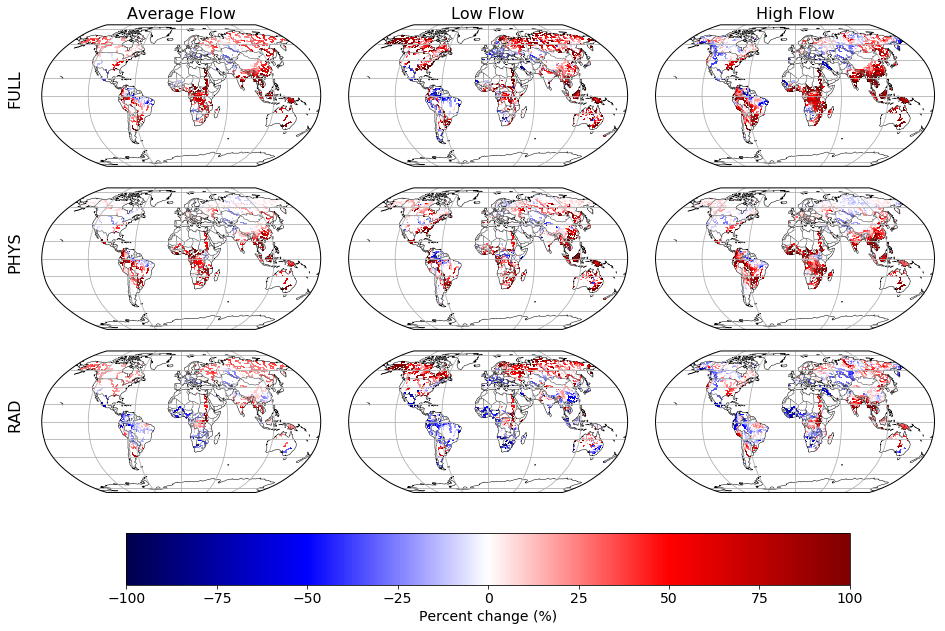

In [6]:
## --- Set up figure window --- 
fig, ax_array = plt.subplots(3,3,subplot_kw={'projection':ccrs.Robinson()})
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax_array.flatten()
#fig.set_size_inches(11.5,8.5)
fig.set_size_inches(16,12)

maxCol = 100
minCol = -maxCol

# ---- Set 1: Change in mean flow ---- #
##Subplot 1: Qmean (FULL)##
ax1.set_global()
contour_plot = ax1.pcolormesh(lon,lat,pctAvgFull,cmap='seismic',vmin=minCol,vmax=maxCol,transform=ccrs.PlateCarree())
#Other figure options 
ax1.set_title('Average Flow')
ax1.title.set_fontsize(16)
ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#Add ylabel
ax1.text(-0.07, 0.55, 'FULL', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes,fontsize=16)

##Subplot 4: Qmean (PHYS)##
ax4.set_global()
contour_plot = ax4.pcolormesh(lon,lat,pctAvgPhys,cmap='seismic',vmin=minCol,vmax=maxCol,transform=ccrs.PlateCarree())
#Other figure options 
ax4.coastlines(linewidth=0.5,edgecolor='0.25')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#Add ylabel
ax4.text(-0.07, 0.55, 'PHYS', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax4.transAxes,fontsize=16)

##Subplot 7: Qmean (RAD)##
ax7.set_global()
contour_plot = ax7.pcolormesh(lon,lat,pctAvgRad,cmap='seismic',vmin=minCol,vmax=maxCol,transform=ccrs.PlateCarree())
#Other figure options 
ax7.coastlines(linewidth=0.5,edgecolor='0.25')
ax7.gridlines()
ax7.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#Add ylabel
ax7.text(-0.07, 0.55, 'RAD', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax7.transAxes,fontsize=16)

# ---- Set 2: Change in low flow ---- #
##Subplot 1: Qlow (FULL)##
contour_plot = ax2.pcolormesh(lon,lat,pctMinFull,cmap='seismic',vmin=minCol,vmax=maxCol,transform=ccrs.PlateCarree())
#Other figure options 
ax2.set_title('Low Flow')
ax2.title.set_fontsize(16)
ax2.coastlines(linewidth=0.5,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

##Subplot 5: Qlow (PHYS)##
contour_plot = ax5.pcolormesh(lon,lat,pctMinPhys,cmap='seismic',vmin=minCol,vmax=maxCol,transform=ccrs.PlateCarree())
#Other figure options 
ax5.coastlines(linewidth=0.5,edgecolor='0.25')
ax5.gridlines()
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

##Subplot 8: Qlow (RAD)##
contour_plot = ax8.pcolormesh(lon,lat,pctMinRad,cmap='seismic',vmin=minCol,vmax=maxCol,transform=ccrs.PlateCarree())
# #Colorbar 
ax_position = ax8.get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.2, ax_position.y0, ax_position.width+0.4, 0.06])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
cbar.set_label('Percent change (%)',fontsize=14)
cbar.ax.tick_params(labelsize=14)
#Other figure options 
ax8.coastlines(linewidth=0.5,edgecolor='0.25')
ax8.gridlines()
ax8.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


# ---- Set 3: Change in high flow ---- #
##Subplot 3: QHigh (FULL)##
contour_plot = ax3.pcolormesh(lon,lat,pctMaxFull,cmap='seismic',vmin=minCol,vmax=maxCol,transform=ccrs.PlateCarree())
#Other figure options 
ax3.set_title('High Flow')
ax3.title.set_fontsize(16)
ax3.coastlines(linewidth=0.5,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

##Subplot 6: QHigh (FULL)##
contour_plot = ax6.pcolormesh(lon,lat,pctMaxPhys,cmap='seismic',vmin=minCol,vmax=maxCol,transform=ccrs.PlateCarree())
#Other figure options 
ax6.coastlines(linewidth=0.5,edgecolor='0.25')
ax6.gridlines()
ax6.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

##Subplot 9: QHigh (FULL)##
contour_plot = ax9.pcolormesh(lon,lat,pctMaxRad,cmap='seismic',vmin=minCol,vmax=maxCol,transform=ccrs.PlateCarree())
#Other figure options 
ax9.coastlines(linewidth=0.5,edgecolor='0.25')
ax9.gridlines()
ax9.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

fig.subplots_adjust(wspace=0.1, hspace=-0.5)
plt.show()

#Save figure
#fig.savefig('/gdata/pritchard2/mdfowler/Flooding-physiology/PythonFigs/Fig1_ChangeInMeanLowHighFlows.jpg',bbox_inches = 'tight')  #Save figure as pdf vector graphic




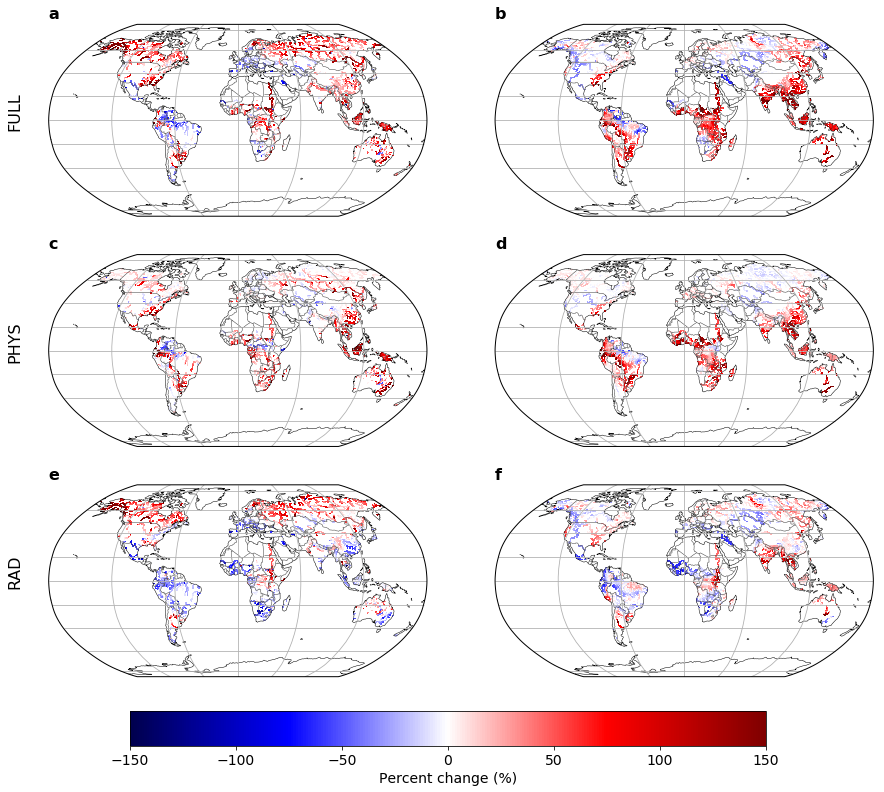

In [9]:
## --- Set up figure window --- 
fig, ax_array = plt.subplots(3,2,subplot_kw={'projection':ccrs.Robinson()})
ax1,ax2,ax3,ax4,ax5,ax6 = ax_array.flatten()
#fig.set_size_inches(11.5,8.5)
fig.set_size_inches(16,12)

# ---- Set 1: Change in low flow ---- #
##Subplot 1: Qlow (FULL)##
contour_plot = ax1.pcolormesh(lon,lat,pctMinFull,cmap='seismic',vmin=-150,vmax=150,transform=ccrs.PlateCarree())
#Other figure options 
#ax1.set_title('Low Flow')
#ax1.set_title('c',{'fontweight' :'bold','fontsize':16},loc='left') 
ax1.set_title('a',{'fontweight' :'bold','fontsize':16},loc='left') 
#plt.title(r'$\alpha > \beta$')
ax1.title.set_fontsize(16)
ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax1.text(-0.07, 0.55, 'FULL', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes,fontsize=16)

##Subplot 3: Qlow (PHYS)##
contour_plot = ax3.pcolormesh(lon,lat,pctMinPhys,cmap='seismic',vmin=-150,vmax=150,transform=ccrs.PlateCarree())
#Other figure options 
ax3.set_title('c',{'fontweight' :'bold','fontsize':16},loc='left') 
ax3.coastlines(linewidth=0.5,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#Add ylabel
ax3.text(-0.07, 0.55, 'PHYS', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax3.transAxes,fontsize=16)



##Subplot 5: Qlow (RAD)##
contour_plot = ax5.pcolormesh(lon,lat,pctMinRad,cmap='seismic',vmin=-150,vmax=150,transform=ccrs.PlateCarree())
# #Colorbar 
ax_position = ax5.get_position()
cbar_ax = fig.add_axes([ax_position.x0+0.1, ax_position.y0-0.08, ax_position.width+0.2, 0.04])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
cbar.set_label('Percent change (%)',fontsize=14)
cbar.ax.tick_params(labelsize=14)
#Other figure options 
ax5.set_title('e',{'fontweight' :'bold','fontsize':16},loc='left') 
ax5.coastlines(linewidth=0.5,edgecolor='0.25')
ax5.gridlines()
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#Add ylabel
ax5.text(-0.07, 0.55, 'RAD', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax5.transAxes,fontsize=16)

# ---- Set 3: Change in high flow ---- #
##Subplot 3: QHigh (FULL)##
contour_plot = ax2.pcolormesh(lon,lat,pctMaxFull,cmap='seismic',vmin=-150,vmax=150,transform=ccrs.PlateCarree())
#Other figure options 
ax2.set_title('b',{'fontweight':'bold','fontsize':16},loc='left')
ax2.title.set_fontsize(16)
ax2.coastlines(linewidth=0.5,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

##Subplot 6: QHigh (FULL)##
contour_plot = ax4.pcolormesh(lon,lat,pctMaxPhys,cmap='seismic',vmin=-150,vmax=150,transform=ccrs.PlateCarree())
#Other figure options 
ax4.set_title('d',{'fontweight':'bold','fontsize':16},loc='left')
ax4.coastlines(linewidth=0.5,edgecolor='0.25')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

##Subplot 9: QHigh (FULL)##
contour_plot = ax6.pcolormesh(lon,lat,pctMaxRad,cmap='seismic',vmin=-150,vmax=150,transform=ccrs.PlateCarree())
#Other figure options 
ax6.set_title('f',{'fontweight':'bold','fontsize':16},loc='left')
ax6.coastlines(linewidth=0.5,edgecolor='0.25')
ax6.gridlines()
ax6.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

fig.subplots_adjust(wspace=0, hspace=0.2)
#plt.show()

#Save figure
#fig.savefig('/gdata/pritchard2/mdfowler/Flooding-physiology/PythonFigs/Fig1_ChangeInMeanLowHighFlows.jpg',bbox_inches = 'tight')  #Save figure as pdf vector graphic
fig.savefig('/Users/meganfowler/gp_fuse/Flooding-physiology/PythonFigs/Fig2_ChangeInMeanLowHighFlows-Poster.pdf',bbox_inches = 'tight')  #Save figure as pdf vector graphic




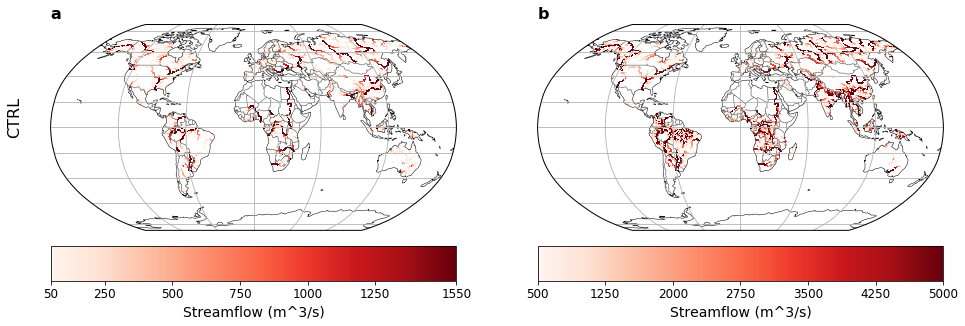

In [10]:
## --- Set up figure window --- 
fig, ax_array = plt.subplots(1,2,subplot_kw={'projection':ccrs.Robinson()})
ax1,ax2 = ax_array.flatten()
#fig.set_size_inches(11.5,8.5)
fig.set_size_inches(16,12)

# ---- Set 1: Change in mean flow ---- #
##Subplot 1: Qmean (FULL)##
ax1.set_global()
contour_plot = ax1.pcolormesh(lon,lat,minCtrlNew,cmap='Reds',vmin=50,vmax=1550,transform=ccrs.PlateCarree())
#Other figure options 
ax1.set_title('a',{'fontweight' :'bold','fontsize':16},loc='left') 
ax1.title.set_fontsize(16)
ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#Add ylabel
ax1.text(-0.07, 0.55, 'CTRL', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes,fontsize=16)
# #Colorbar 
ax_position = ax1.get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0+0.2, ax_position.width, 0.04])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,ticks=[50,250,500,750,1000,1250,1550])
cbar.set_label('Streamflow (m^3/s)',fontsize=14)
cbar.ax.tick_params(labelsize=12)
# tick_locator = ticker.MaxNLocator(nbins=5)
# cbar.locator = tick_locator
# cbar.update_ticks()

##Subplot 2: Qmean (PHYS)##
ax2.set_global()
contour_plot = ax2.pcolormesh(lon,lat,maxCtrlNew,cmap='Reds',vmin=500,vmax=5000,transform=ccrs.PlateCarree())
#Other figure options 
ax2.set_title('b',{'fontweight' :'bold','fontsize':16},loc='left') 
ax2.title.set_fontsize(16)
ax2.coastlines(linewidth=0.5,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
# #Colorbar 
ax_position = ax2.get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0+0.2, ax_position.width, 0.04])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,ticks=[500,1250,2000,2750,3500,4250,5000])
cbar.set_label('Streamflow (m^3/s)',fontsize=14)
cbar.ax.tick_params(labelsize=12)


#fig.subplots_adjust(wspace=0, hspace=0.2)

fig.savefig('/Users/meganfowler/gp_fuse/Flooding-physiology/PythonFigs/FigS3_BackgroundAnnualExtrFlow.eps',bbox_inches = 'tight')  #Save figure as pdf vector graphic





## Basin Maps


Basins are defined as follows: 
<font color=green>
% Key: <br>
   1.......Yukon <br>
   2.......Mackenzie<br>
   3.......Columbia<br>
   4.......Nelson<br>
   5.......Mississippi<br>
   6.......St-Lawrence<br>
   7.......Rhine<br>
   8.......Danube<br>
   9.......Dniepr<br>
   10......Volga<br>
   11......Ob<br>
   12......Yenisei<br>
   13......Lena<br>
   14......Amur<br>
   15......Orinoco<br>
   16......Parana<br>
   17......Amazonas<br>
   18......Niger<br>
   19......Congo<br>
   20......Nile<br>
   21......Zambezi<br>
   22......Tigris & Euphrates<br>
   23......Indus<br>
   24......Ganges & Brahmaputra<br>
   25......Mekong<br>
   26......Huang-he<br>
   27......Yangtze<br>
   28......Murray & Darling<br>
   29......Don<br>
   30......Fraser<br>
   31......Tocantins<br>
   32......Vuoski & Neva<br>
    </font>

In [4]:
#Get dimensions from a single file (same will be used for all files)
file1 = 'outflw1161.nc'
dat   = Dataset(file1)
lat   = dat.variables['lat'][:] 
lon   = dat.variables['lon'][:] 

#Read in bsin ID identifiers from Matlab file 
basinData = sio.loadmat('BasinMask.mat')
basinMask = basinData['BasinMask']

#Define list of basin names based on key (used in plotting)
basinNames = ['Yukon','Mackenzie','Columbia','Nelson','Mississippi','St-Lawrence','Rhine','Danube','Dniepr','Volga','Ob','Yenisei',\
'Lena','Amur','Orinoco','Parana','Amazonas','Niger','Congo','Nile','Zambezi','Tigris & Euphrates','Indus',\
'Ganges & Brahmaputra','Mekong','Huang-he','Yangtze','Murray & Darling','Don','Fraser','Tocantins','Vuoski & Neva']



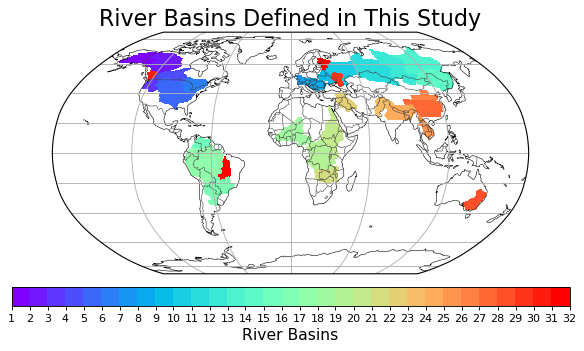

In [25]:
## PLOT basin definitions 

fig=plt.figure(figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
my_fontsize = 14

## --- Set axes and color sections --- 
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()
bounds = np.arange(32)+1
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
fig.set_size_inches(9,4)

## --- Create Plot ---
contour_plot = ax.pcolormesh(lon,lat,np.transpose(basinMask),norm=norm,cmap=plt.cm.rainbow,vmin=1,vmax=32,transform=ccrs.PlateCarree())

# Colorbar
ax_position = ax.get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.1, ax_position.width, 0.06])
cbar = plt.colorbar(contour_plot, orientation='horizontal',ticks=range(33),cax=cbar_ax)
cbar.set_label('River Basins',fontsize=my_fontsize)
#cbar.ax.set_xticklabels(['1','5','25','50','75', '95','105','125','250','500','1000','>1000'],fontsize=my_fontsize)  # vertically oriented colorbar

#Additional options 
ax.set_title('River Basins Defined in This Study')
ax.title.set_fontsize(20)
ax.coastlines(linewidth=0.5,edgecolor='0.25')
ax.gridlines()
ax.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



In [5]:
#Get basin average lon/lat
avgLon = np.full(np.shape(basinNames),np.nan)
avgLat = np.full(np.shape(basinNames),np.nan)

for iB in range(len(basinNames)):
    lonBasin = []
    latBasin = []
    for ilon in range(len(lon)):
        for ilat in range(len(lat)): 
            if basinMask[ilon,ilat]==(iB+1): 
                lonBasin = np.append(lonBasin,lon[ilon])
                latBasin = np.append(latBasin,lat[ilat])
                
    avgLon[iB] = np.median(lonBasin)
    avgLat[iB] = np.median(latBasin)



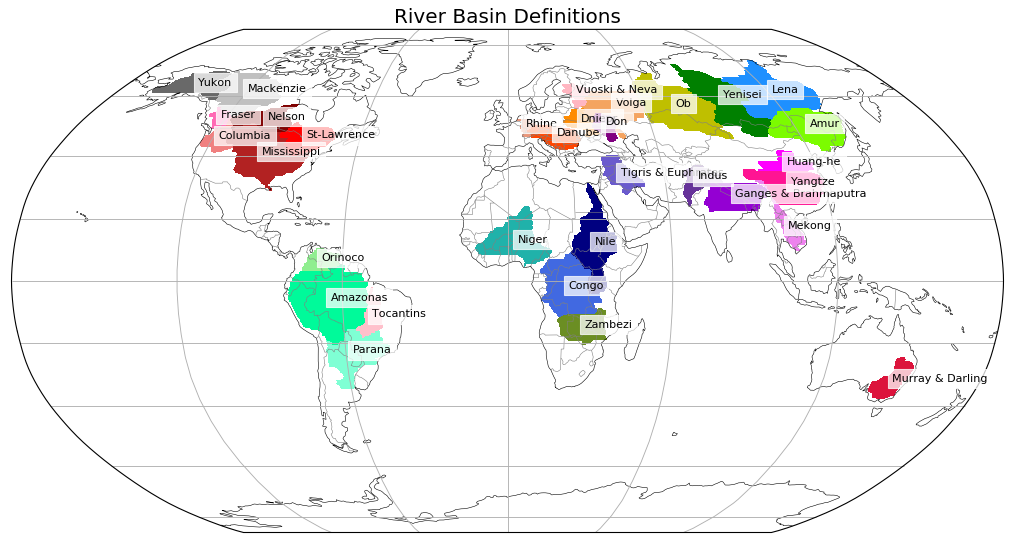

In [33]:
## PLOT basin definitions 
from matplotlib import colors as c

fig=plt.figure(figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
my_fontsize = 14

## --- Set axes and color sections --- 
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()
#fig.set_size_inches(9,4)
fig.set_size_inches(16,12)
#Additional options 
ax.set_title('River Basin Definitions')
ax.title.set_fontsize(18)
ax.coastlines(linewidth=0.5,edgecolor='0.5')
ax.gridlines()
ax.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.5')
    
colorChoices = ['dimgray','silver','lightcoral','maroon','firebrick','red',
                'darksalmon','orangered','darkorange','sandybrown','y','g','dodgerblue',
               'lawngreen','lightgreen','aquamarine','mediumspringgreen','lightseagreen',
               'royalblue','navy','olivedrab','slateblue','rebeccapurple','darkviolet',
                'violet','fuchsia','deeppink','crimson','purple','hotpink','pink','lightpink']
#cMapTest = c.ListedColormap(colorChoices)

for iB in range(len(basinNames)): 
    tempArr = np.full(np.shape(basinMask),np.nan)
    tempArr[np.where(basinMask==(iB+1))]=1
    #contour_plot = ax.pcolormesh(lon,lat,np.transpose(tempArr),norm=norm,color=colorChoices[iB],transform=ccrs.PlateCarree())
    
    contourplt = ax.contourf(lon,lat,np.transpose(tempArr),colors=colorChoices[iB],transform=ccrs.PlateCarree())
    #Label basins
    ax.text(avgLon[iB],avgLat[iB], basinNames[iB],transform=ccrs.PlateCarree(),
        fontsize=10,bbox=dict(facecolor='white',edgecolor='white', alpha=0.75))

#ax.set_extent([-10, 180, -90, 90])   
#Label basins
# ax.text(avgLon[0]-10,avgLat[0]+11,basinNames[0],transform=ccrs.PlateCarree(),   #Yukon
#         fontsize=10,bbox=dict(facecolor='white',edgecolor='white', alpha=0.85))
# ax.text(avgLon[1]+4,avgLat[1]+2,basinNames[1],transform=ccrs.PlateCarree(),     #Mackenzie
#         fontsize=10,bbox=dict(facecolor='white',edgecolor='white', alpha=0.85))
# ax.text(avgLon[2]+10,avgLat[2]+1,basinNames[2],transform=ccrs.PlateCarree(),    #Columbia
#         fontsize=10,bbox=dict(facecolor='white',edgecolor='white', alpha=0.85))